In [2]:
import os, glob
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs

In [20]:
table = []
inters = ['Li_and_Liu','Four','ATL','TTL']
for inter in inters:
    files = glob.glob(f'./unbalanced_1hour_41/*_{inter}*.xml')
    df = pd.DataFrame(columns=['PCUs/hour','Average_Time_Delay','Travel_Time'])
    for i in files:
        travel_time = {}
        ATT = []
        ADT = []
        delay = {}
        df1 = {'PCUs/hour': float(i.split('/')[-1].split('_')[0])*4}
        with open(i, "r") as file:
            content = file.read() # Read each line in the file, readlines() returns a list of lines
            
            content = "".join(content) # Combine the lines in the list into a string

            bs_content = bs(content, "lxml")

        tripinfo = list(bs_content.find_all("tripinfo"))

        for trip in tripinfo:
            try:
                ADT.append(float(trip["waitingtime"]))
                delay[trip["id"].split(".")[1].split("_")[0]].append(float(trip["waitingtime"]))
            except KeyError:
                delay[trip["id"].split(".")[1].split("_")[0]] = []
                delay[trip["id"].split(".")[1].split("_")[0]].append(float(trip["waitingtime"]))
            try:
                ATT.append(float(trip["duration"]))
                travel_time[trip["id"].split(".")[1].split("_")[0]].append(float(trip["duration"]))
            except KeyError:
                travel_time[trip["id"].split(".")[1].split("_")[0]] = []
                travel_time[trip["id"].split(".")[1].split("_")[0]].append(float(trip["duration"]))
        

        for j in delay.keys():
            delay[j] = np.mean(delay[j])
            travel_time[j] = np.mean(travel_time[j])
        df1['Average_Time_Delay'] = np.mean(ADT)
        df1['Travel_Time'] = np.mean(ATT)

        df=df.append(df1,ignore_index=True)
    df=df.sort_values(by=['PCUs/hour'])
    table.append(df)
table = dict(zip(inters,table))
table

/home/arms04/.local/lib/python3.8/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


{'Li_and_Liu':    PCUs/hour  Average_Time_Delay  Travel_Time
 1      600.0            0.162888    56.877963
 3      800.0            0.172036    57.048238
 0     1000.0            0.207287    57.589870
 4     1200.0            0.238998    58.040456
 2     1400.0            0.367103    59.253049,
 'Four':    PCUs/hour  Average_Time_Delay  Travel_Time
 2      600.0            0.509694    65.654252
 3      800.0            1.081582    67.603978
 4     1000.0            1.508192    69.106663
 1     1200.0            2.133273    71.346007
 0     1400.0            4.366158    80.740849,
 'ATL':    PCUs/hour  Average_Time_Delay  Travel_Time
 2      600.0            6.034233    80.642040
 3      800.0            6.475704    82.038877
 1     1000.0            6.129688    82.441178
 4     1200.0            6.400764    83.399698
 0     1400.0            6.626086    84.685716,
 'TTL':    PCUs/hour  Average_Time_Delay  Travel_Time
 4      600.0            9.120115    93.886760
 2      800.0        

In [21]:
# labels = ['Three-way','Four-way','Five-way']
labels = ['V2I-C','DIM (Ours)','ATS','FTS']
table

{'Li_and_Liu':    PCUs/hour  Average_Time_Delay  Travel_Time
 1      600.0            0.162888    56.877963
 3      800.0            0.172036    57.048238
 0     1000.0            0.207287    57.589870
 4     1200.0            0.238998    58.040456
 2     1400.0            0.367103    59.253049,
 'Four':    PCUs/hour  Average_Time_Delay  Travel_Time
 2      600.0            0.509694    65.654252
 3      800.0            1.081582    67.603978
 4     1000.0            1.508192    69.106663
 1     1200.0            2.133273    71.346007
 0     1400.0            4.366158    80.740849,
 'ATL':    PCUs/hour  Average_Time_Delay  Travel_Time
 2      600.0            6.034233    80.642040
 3      800.0            6.475704    82.038877
 1     1000.0            6.129688    82.441178
 4     1200.0            6.400764    83.399698
 0     1400.0            6.626086    84.685716,
 'TTL':    PCUs/hour  Average_Time_Delay  Travel_Time
 4      600.0            9.120115    93.886760
 2      800.0        

### Plotting Average time delay bar graph

[-0.2        -0.06666667  0.06666667  0.2       ]
4


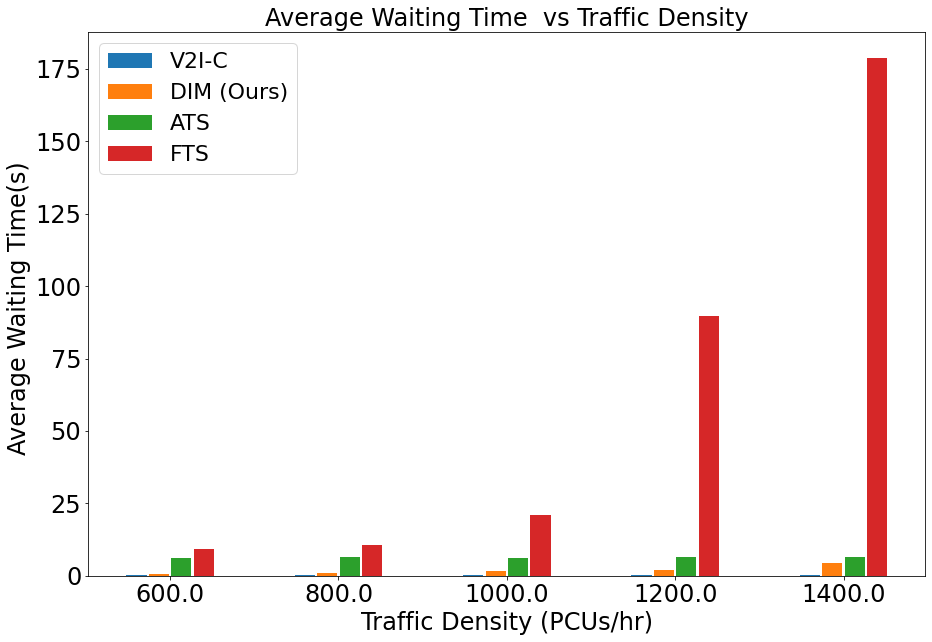

In [22]:
import numpy as np 
import matplotlib.pyplot as plt 
  
# X = list(table[0]['PCUs/hour'])
fig,ax = plt.subplots()
fig.set_size_inches(15,10)
mosad = np.linspace(-0.2,0.2,4)
print(mosad)
count = 0
for i, j in table.items():
    X_axis = np.arange(len(list(j['PCUs/hour'])))
    ax.bar(X_axis + mosad[count], list(j['Average_Time_Delay']), 0.12, label = f'{labels[count]}')
    count += 1
    # plt.bar(X_axis + 0.2, list(j['Travel_Time']), 0.4, label = f'{i}')
print(count)
X = list(table['Four']['PCUs/hour'])
ax.set_xticks(X_axis, X)
# ax.set_yticks(ax.get_yticks(),fontsize=16)
ax.tick_params(labelsize = 24)
ax.set_xlabel("Traffic Density (PCUs/hr)",fontsize=24)
ax.set_ylabel("Average Waiting Time(s) ",fontsize=24)
ax.set_title("Average Waiting Time  vs Traffic Density",fontsize=24)
ax.legend(fontsize=22)
plt.show()
fig.savefig("unbalanced_41_delay.png", dpi = 100,bbox_inches='tight', pad_inches=0.1,facecolor='w')

### Plotting Average Travel Time Bar graph

[-0.2        -0.06666667  0.06666667  0.2       ]
4
[0 1 2 3 4] [600.0, 800.0, 1000.0, 1200.0, 1400.0]


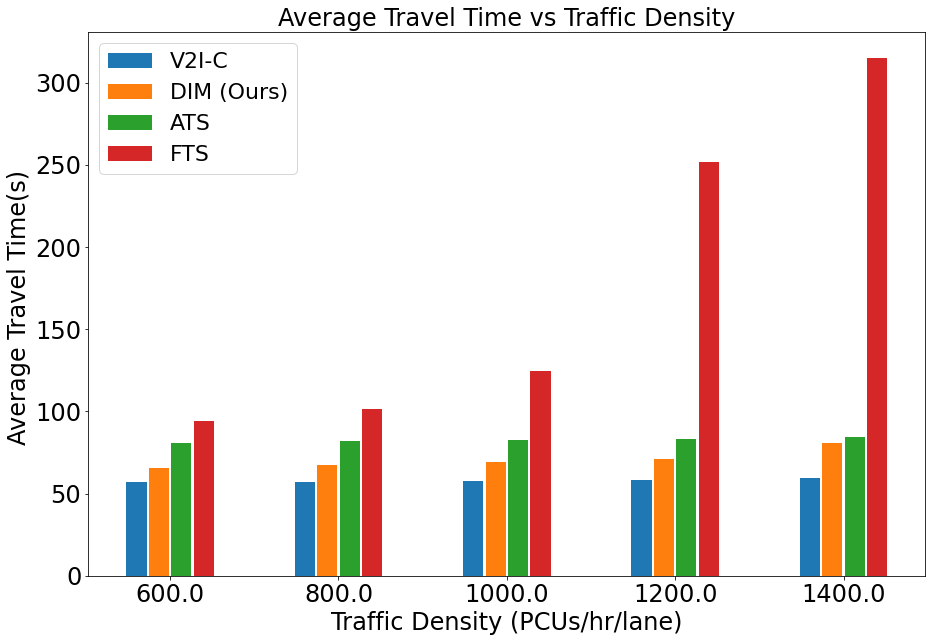

In [24]:
import numpy as np 
import matplotlib.pyplot as plt 
  
# X = list(table[0]['PCUs/hour'])
fig,ax = plt.subplots()
fig.set_size_inches(15,10)
mosad = np.linspace(-0.2,0.2,4)
print(mosad)
count = 0
for i, j in table.items():
    X_axis = np.arange(len(list(j['PCUs/hour'])))
    ax.bar(X_axis + mosad[count], list(j['Travel_Time']), 0.12, label = f'{labels[count]}')
    count += 1
    # plt.bar(X_axis + 0.2, list(j['Travel_Time']), 0.4, label = f'{i}')
print(count)
X = list(table['Four']['PCUs/hour'])
print(X_axis,X,)
ax.set_xticks(X_axis, X)
ax.tick_params(labelsize = 24)
ax.set_xlabel("Traffic Density (PCUs/hr/lane)",fontsize=24)
ax.set_ylabel("Average Travel Time(s) ",fontsize=24)
ax.set_title("Average Travel Time vs Traffic Density",fontsize=24)
ax.legend(fontsize=22)
plt.show()
fig.savefig("unbalanced_41_TT.png", dpi = 100,bbox_inches='tight', pad_inches=0.1,facecolor='w')

[-0.1  0.   0.1]
3
[0 1 2] [2, 3, 4]


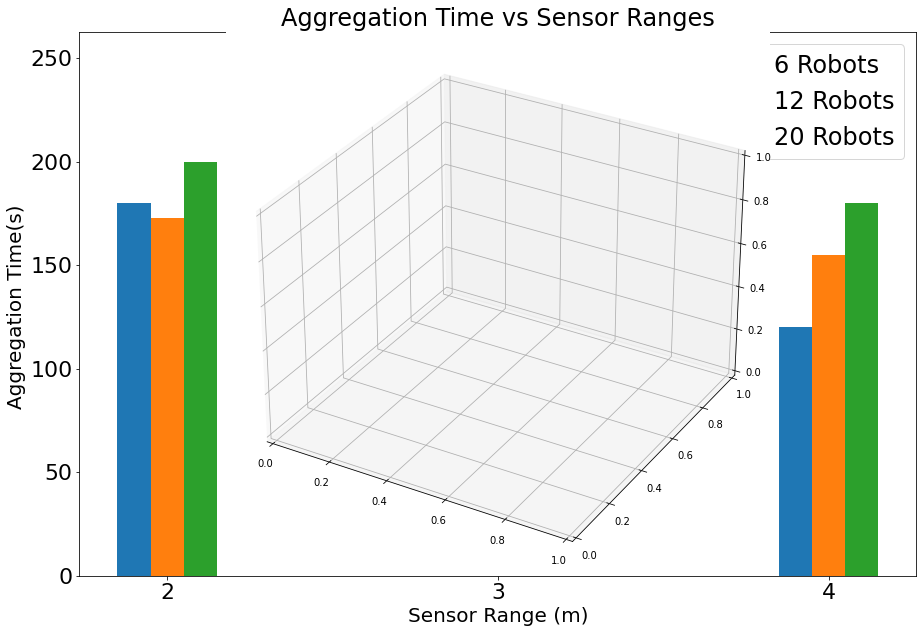

In [4]:
df1 = pd.read_csv('t.csv')
import numpy as np 
import matplotlib.pyplot as plt 
  
table  = {"6 Robots":pd.DataFrame({'range':[2,3,4],'time':[180,230,120]}),
          "12 Robots":pd.DataFrame({'range':[2,3,4],'time':[173,250,155]}),
          "20 Robots":pd.DataFrame({'range':[2,3,4],'time':[200,230,180]})}

import numpy as np 
import matplotlib.pyplot as plt 
  
# X = list(table[0]['PCUs/hour'])
fig,ax = plt.subplots()
fig.add_subplot(111, projection = '3d')
fig.set_size_inches(15,10)
mosad = np.linspace(-0.1,0.1,3)
print(mosad)
count = 0
for i, j in table.items():
    X_axis = np.arange(len(list(j['range'])))
    ax.bar(X_axis + mosad[count], list(j['time']), 0.1, label = f'{i}')
    count += 1
    # plt.bar(X_axis + 0.2, list(j['Travel_Time']), 0.4, label = f'{i}')
print(count)
X = list(table['6 Robots']['range'])
print(X_axis,X,)
ax.set_xticks(X_axis, X)
ax.tick_params(labelsize = 22)
ax.set_xlabel("Sensor Range (m)",fontsize=20)
ax.set_ylabel("Aggregation Time(s) ",fontsize=20)
ax.set_title("Aggregation Time vs Sensor Ranges",fontsize=24)
ax.legend(fontsize="24")
plt.show()
fig.savefig("SWE_PIC.png", dpi = 100,bbox_inches='tight', pad_inches=0.1,facecolor='w')

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
/usr/share/python-wheels/urllib3-1.25.8-py2.py3-none-any.whl/urllib3/connectionpool.py:999: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pypi.ngc.nvidia.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
     |████████████████████████████████| 511 kB 20.0 MB/s eta 0:00:01


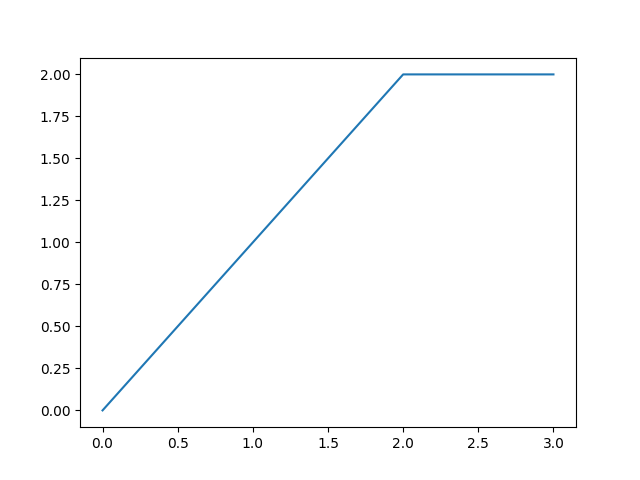

In [7]:
!pip3 install ipympl
%matplotlib widget
# aka import ipympl

import matplotlib.pyplot as plt

plt.plot([0, 1, 2, 2])
plt.show()

[0 1 2] ('2', '3', '4')


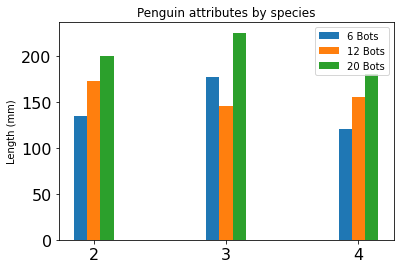

In [71]:
ran = ("2", "3", "4")
no_of_bots = {
    '6 Bots': (135,177,120),
    '12 Bots': (173,145,155),
    '20 Bots': (200,225,180),
}

x = np.arange(len(ran))  # the label locations
width = 0.2  # the width of the bars
multiplier = 10
a=[-0.1,0,0.1]
fig, ax = plt.subplots()
c=0
for attribute, measurement in no_of_bots.items():
    ax.bar(x + a[c], list(measurement), 0.1, label=attribute)
    # ax.bar_label(rects, padding=3)
    c +=1
    

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
print(x,ran)
ax.set_xticks(x,ran)
ax.tick_params(labelsize = 16)
ax.legend()
plt.show()